<a href="https://colab.research.google.com/github/MohammedRSaad/Osteoporosis-indecator/blob/main/best_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [1]:
import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics

from keras.models import load_model

# **Importing the data**

#### **Columns used in for the dataset**

In [214]:
columns = ['SEQN', 'BMXWT', 'BMXHT', 'BMXBMI', 'BPQ020', 'BPQ080', 'PEASCST1',\
           'PEASCTM1', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DIQ010', 'KIQ022',\
           'KIQ026', 'MGQ070', 'MGQ100', 'MGXH1T1', 'MGXH1T1E', 'MGXH2T1',\
           'MGXH2T1E', 'MGXH1T2', 'MGXH1T2E', 'MGXH2T2', 'MGXH2T2E', 'MGXH1T3',\
           'MGXH1T3E', 'MGXH2T3', 'MGXH2T3E', 'MGDCGSZ', 'DXXLABMC', 'DXXLABMD',\
           'DXXRABMC', 'DXXRABMD', 'DXDTOBMC', 'DXDTOBMD']

#### **Connecting Google Colab with Google Drive to get the data**

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **NHANES 2011-2012 data:**

In [216]:
body_measures_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/BMX_G.csv").drop_duplicates(subset=['SEQN'])
blood_pressure_Q_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/BPQ_G.csv").drop_duplicates(subset=['SEQN'])
blood_pressure_X_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/BPX_G.csv").drop_duplicates(subset=['SEQN'])
demographic_data_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/DEMO_G.csv").drop_duplicates(subset=['SEQN'])
diabetes_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/DIQ_G.csv").drop_duplicates(subset=['SEQN'])
kidney_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/KIQ_U_G.csv").drop_duplicates(subset=['SEQN'])
muscle_strength_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/MGX_G.csv").drop_duplicates(subset=['SEQN'])
bone_prameters_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/DXX_G.csv").drop_duplicates(subset=['SEQN'])

#### **NHANES 2013-2012 data:**

In [217]:
body_measures_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/BMX_H.csv").drop_duplicates(subset=['SEQN'])
blood_pressure_Q_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/BPQ_H.csv").drop_duplicates(subset=['SEQN'])
blood_pressure_X_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/BPX_H.csv").drop_duplicates(subset=['SEQN'])
demographic_data_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/DEMO_H.csv").drop_duplicates(subset=['SEQN'])
diabetes_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/DIQ_H.csv").drop_duplicates(subset=['SEQN'])
kidney_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/KIQ_U_H.csv").drop_duplicates(subset=['SEQN'])
muscle_strength_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/MGX_H.csv").drop_duplicates(subset=['SEQN'])
bone_prameters_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/DXX_H.csv").drop_duplicates(subset=['SEQN'])

# **Data Cleaning** 

#### **Merging data**

In [218]:
datasets_11 = [body_measures_11, demographic_data_11, diabetes_11, kidney_11, muscle_strength_11, bone_prameters_11]
df_11 = pd.concat([df.set_index(['SEQN']) for df in datasets_11], axis=1)
df_11.reset_index(inplace=True)
df_11

,SEQN,BMXWT,BMXHT,BMXBMI,RIAGENDR,RIDAGEYR,RIDRETH3,DIQ010,KIQ022,KIQ026,...,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,62161,69.2,172.3,23.3,1,22,3,2.0,2.0,2.0,...,1.0,34.9,1.0,69.3,191.80,0.832,193.86,0.843,2588.63,1.213
1,62162,12.7,94.7,14.2,2,3,1,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163,49.4,168.9,17.3,1,14,6,2.0,NaN,NaN,...,1.0,29.4,1.0,71.0,129.83,0.711,145.72,0.748,1931.41,1.016
3,62164,67.2,170.1,23.2,2,44,3,2.0,2.0,2.0,...,1.0,37.4,1.0,75.8,138.59,0.662,149.31,0.691,2038.72,1.075
4,62165,69.1,159.4,27.2,2,14,4,2.0,NaN,NaN,...,1.0,25.0,1.0,50.5,126.29,0.668,125.20,0.658,1943.51,1.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,71912,87.8,177.3,27.9,1,40,3,2.0,2.0,2.0,...,1.0,44.3,1.0,93.9,236.26,0.842,238.32,0.888,2421.32,1.088
9752,71913,56.5,161.6,21.6,2,18,6,2.0,NaN,NaN,...,1.0,29.1,1.0,59.0,144.29,0.696,157.22,0.753,1976.22,1.053
9753,71914,32.3,148.1,14.7,2,10,3,2.0,NaN,NaN,...,1.0,18.5,1.0,37.0,85.93,0.560,84.59,0.566,1218.31,0.799
9754,71915,78.4,168.8,27.5,1,60,3,1.0,2.0,2.0,...,1.0,22.0,1.0,55.5,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
datasets_13 = [body_measures_13, demographic_data_13, diabetes_13, kidney_13, muscle_strength_13, bone_prameters_13]
df_13 = pd.concat([df.set_index(['SEQN']) for df in datasets_13], axis=1)
df_13.reset_index(inplace=True)
df_13

,SEQN,BMXWT,BMXHT,BMXBMI,RIAGENDR,RIDAGEYR,RIDRETH3,DIQ010,KIQ022,KIQ026,...,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,73557.0,78.3,171.3,26.7,1.0,69.0,4.0,1.0,2.0,2.0,...,1.0,33.4,1.0,55.2,NaN,NaN,NaN,NaN,NaN,NaN
1,73558.0,89.5,176.8,28.6,1.0,54.0,3.0,1.0,2.0,2.0,...,1.0,22.5,1.0,61.5,198.48,0.800,213.60,0.816,2276.24,1.024
2,73559.0,88.9,175.3,28.9,1.0,72.0,3.0,1.0,1.0,2.0,...,1.0,46.9,1.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN
3,73560.0,32.2,137.3,17.1,1.0,9.0,3.0,2.0,NaN,NaN,...,1.0,17.9,1.0,32.2,56.28,0.554,62.14,0.610,1127.39,0.856
4,73561.0,52.0,162.4,19.7,2.0,73.0,3.0,2.0,1.0,2.0,...,1.0,17.8,1.0,30.9,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,83728.0,11.3,84.4,15.9,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10172,83729.0,89.6,162.3,34.0,NaN,NaN,NaN,2.0,2.0,2.0,...,1.0,20.0,1.0,46.6,140.19,0.697,162.25,0.713,2112.83,1.110
10173,83730.0,22.8,119.1,16.1,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,8.4,1.0,20.8,NaN,NaN,NaN,NaN,NaN,NaN
10174,83731.0,42.3,148.1,19.3,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,19.5,1.0,36.0,80.89,0.610,81.89,0.606,1265.84,0.906


In [220]:
df = pd.concat([df_11, df_13]).reset_index(drop=True)
df

,SEQN,BMXWT,BMXHT,BMXBMI,RIAGENDR,RIDAGEYR,RIDRETH3,DIQ010,KIQ022,KIQ026,...,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,62161.0,69.2,172.3,23.3,1.0,22.0,3.0,2.0,2.0,2.0,...,1.0,34.9,1.0,69.3,191.80,0.832,193.86,0.843,2588.63,1.213
1,62162.0,12.7,94.7,14.2,2.0,3.0,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163.0,49.4,168.9,17.3,1.0,14.0,6.0,2.0,NaN,NaN,...,1.0,29.4,1.0,71.0,129.83,0.711,145.72,0.748,1931.41,1.016
3,62164.0,67.2,170.1,23.2,2.0,44.0,3.0,2.0,2.0,2.0,...,1.0,37.4,1.0,75.8,138.59,0.662,149.31,0.691,2038.72,1.075
4,62165.0,69.1,159.4,27.2,2.0,14.0,4.0,2.0,NaN,NaN,...,1.0,25.0,1.0,50.5,126.29,0.668,125.20,0.658,1943.51,1.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19927,83728.0,11.3,84.4,15.9,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19928,83729.0,89.6,162.3,34.0,NaN,NaN,NaN,2.0,2.0,2.0,...,1.0,20.0,1.0,46.6,140.19,0.697,162.25,0.713,2112.83,1.110
19929,83730.0,22.8,119.1,16.1,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,8.4,1.0,20.8,NaN,NaN,NaN,NaN,NaN,NaN
19930,83731.0,42.3,148.1,19.3,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,19.5,1.0,36.0,80.89,0.610,81.89,0.606,1265.84,0.906


#### **Data cleaning**

In [221]:
df.dropna(inplace=True)
df = df[df['RIDAGEYR'] > 15]
df.reset_index(inplace=True, drop=True)
df

,SEQN,BMXWT,BMXHT,BMXBMI,RIAGENDR,RIDAGEYR,RIDRETH3,DIQ010,KIQ022,KIQ026,...,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,62161.0,69.2,172.3,23.3,1.0,22.0,3.0,2.0,2.0,2.0,...,1.0,34.9,1.0,69.3,191.80,0.832,193.86,0.843,2588.63,1.213
1,62164.0,67.2,170.1,23.2,2.0,44.0,3.0,2.0,2.0,2.0,...,1.0,37.4,1.0,75.8,138.59,0.662,149.31,0.691,2038.72,1.075
2,62169.0,54.6,164.8,20.1,1.0,21.0,6.0,2.0,2.0,2.0,...,1.0,35.7,1.0,86.5,151.45,0.782,171.93,0.812,2024.57,1.091
3,62172.0,98.6,172.0,33.3,2.0,43.0,4.0,2.0,2.0,2.0,...,1.0,35.2,1.0,69.6,189.26,0.723,199.91,0.715,2460.49,1.065
4,62179.0,91.4,182.1,27.6,1.0,55.0,6.0,2.0,2.0,2.0,...,1.0,52.9,1.0,115.4,234.46,0.804,241.37,0.827,2682.80,1.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,83540.0,74.0,166.0,26.9,1.0,30.0,3.0,2.0,2.0,2.0,...,1.0,16.3,1.0,36.1,198.30,0.861,213.45,0.897,2716.18,1.284
5430,83541.0,72.1,163.1,27.1,1.0,44.0,1.0,2.0,2.0,2.0,...,1.0,25.4,1.0,62.9,189.69,0.855,207.89,0.900,2532.22,1.275
5431,83546.0,90.7,185.5,26.4,1.0,59.0,3.0,2.0,2.0,2.0,...,1.0,50.6,1.0,106.6,241.94,0.909,272.40,0.933,3380.93,1.369
5432,83554.0,89.3,169.0,31.3,1.0,49.0,7.0,2.0,2.0,2.0,...,1.0,35.3,1.0,74.2,225.08,0.871,236.01,0.902,2889.10,1.296


# **Data Analysis** 

#### **Data report**

In [222]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [223]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("your_report.html")

In [224]:
#profile

#### **Creating new column for having ostoeporosis**

In [225]:
df['have_disease'] = df['DXXLABMD']
for i in range(1, 8):
  BMD_mean = df.loc[df['RIDRETH3'] == i, 'DXXLABMD'].mean()
  print(f'{i} mean: {BMD_mean}')
  BMD_std = df.loc[df['RIDRETH3'] == i, 'DXXLABMD'].std()
  print(f'{i} std: {BMD_std}')

  df.loc[df['RIDRETH3'] == i, 'have_disease'] -= BMD_mean
  df.loc[df['RIDRETH3'] == i, 'have_disease'] /= BMD_std
  df.loc[df['RIDRETH3'] == i, 'have_disease'] = df.loc[df['RIDRETH3'] == i, 'have_disease'] < -1
df.have_disease = df.have_disease.astype(int)
df.sample(10)

1 mean: 0.7681582002902757
1 std: 0.0894269690033629
2 mean: 0.7543664596273293
2 std: 0.09104264807756322
3 mean: 0.7804827586206897
3 std: 0.09258169799549244
4 mean: 0.8089072512647555
4 std: 0.09837630240888723
5 mean: nan
5 std: nan
6 mean: 0.7300079051383399
6 std: 0.08537724722523443
7 mean: 0.7918100000000001
7 std: 0.10271781073998842


,SEQN,BMXWT,BMXHT,BMXBMI,RIAGENDR,RIDAGEYR,RIDRETH3,DIQ010,KIQ022,KIQ026,...,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD,have_disease
2953,75057.0,77.7,151.7,33.8,2.0,55.0,2.0,2.0,2.0,2.0,...,27.2,1.0,49.3,107.50,0.632,118.78,0.649,1600.81,0.974,1
4976,81923.0,94.7,183.8,28.0,1.0,35.0,4.0,2.0,2.0,2.0,...,58.6,2.0,122.4,297.55,0.878,307.31,0.896,3485.67,1.269,0
1347,67370.0,54.3,168.7,19.1,1.0,41.0,6.0,2.0,2.0,2.0,...,35.2,1.0,71.3,143.44,0.730,146.86,0.752,1928.22,0.988,0
2184,70499.0,80.6,155.1,33.5,2.0,47.0,1.0,2.0,2.0,2.0,...,24.4,1.0,53.1,127.67,0.658,134.32,0.656,1913.53,0.990,1
31,62277.0,67.5,164.2,25.0,2.0,55.0,3.0,2.0,2.0,2.0,...,23.6,1.0,55.6,142.39,0.681,145.64,0.670,2010.03,1.040,1
3890,78280.0,71.5,158.6,28.4,2.0,41.0,3.0,2.0,2.0,2.0,...,27.1,1.0,58.8,149.58,0.710,150.08,0.702,2253.54,1.151,0
2801,74440.0,79.1,168.0,28.0,2.0,31.0,3.0,2.0,2.0,2.0,...,24.0,1.0,54.3,141.12,0.671,158.87,0.756,2318.12,1.118,1
2402,71341.0,75.6,167.6,26.9,1.0,58.0,6.0,2.0,2.0,2.0,...,33.2,1.0,66.7,165.27,0.734,182.04,0.761,2077.00,0.979,0
2576,73614.0,60.9,167.9,21.6,2.0,55.0,3.0,2.0,2.0,2.0,...,23.4,1.0,50.9,144.05,0.702,148.15,0.723,1986.80,1.048,0
3720,77682.0,95.3,176.9,30.5,1.0,50.0,4.0,1.0,2.0,1.0,...,46.1,1.0,106.8,245.95,0.848,245.92,0.840,2695.31,1.118,0


#### **Setting X and y datasets**

In [226]:
data = df.drop(['SEQN', 'DXXLABMC', 'DXXLABMD', 'DXXRABMC', 'DXXRABMD', 'DXDTOBMC', 'DXDTOBMD'], axis=1)
data = pd.concat([data[data['have_disease'] == True], data[data['have_disease'] == False].sample(900)]).sample(frac=1).reset_index(drop=True)
data

,BMXWT,BMXHT,BMXBMI,RIAGENDR,RIDAGEYR,RIDRETH3,DIQ010,KIQ022,KIQ026,MGQ070,...,MGXH1T2,MGXH1T2E,MGXH2T2,MGXH2T2E,MGXH1T3,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,have_disease
0,84.5,165.1,31.0,2.0,29.0,4.0,2.0,2.0,2.0,2.0,...,29.4,1.0,38.2,1.0,30.9,1.0,34.3,1.0,69.1,1
1,55.0,157.2,22.3,2.0,44.0,4.0,2.0,2.0,2.0,2.0,...,25.1,1.0,26.7,1.0,26.6,1.0,26.7,1.0,53.4,0
2,67.9,149.1,30.5,2.0,40.0,3.0,2.0,2.0,2.0,1.0,...,22.0,1.0,24.1,1.0,22.2,1.0,22.2,1.0,46.3,1
3,63.5,167.4,22.7,2.0,45.0,4.0,2.0,2.0,2.0,2.0,...,28.3,1.0,29.3,1.0,26.7,1.0,30.1,1.0,58.4,0
4,56.6,159.0,22.4,1.0,59.0,4.0,2.0,2.0,2.0,2.0,...,37.1,1.0,39.3,1.0,36.7,1.0,38.3,1.0,76.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,67.5,160.6,26.2,2.0,54.0,3.0,2.0,2.0,2.0,2.0,...,25.4,1.0,23.9,1.0,24.6,1.0,24.3,1.0,51.5,1
1792,93.5,166.6,33.7,2.0,32.0,4.0,2.0,2.0,1.0,2.0,...,33.5,1.0,24.1,1.0,31.3,1.0,29.9,1.0,78.5,0
1793,60.3,153.0,25.8,2.0,49.0,6.0,2.0,2.0,2.0,2.0,...,23.9,1.0,25.6,1.0,25.4,1.0,24.7,1.0,51.0,0
1794,93.5,164.2,34.7,2.0,58.0,4.0,2.0,2.0,2.0,2.0,...,29.6,1.0,26.8,1.0,30.0,1.0,29.6,1.0,62.6,0


In [227]:
y = data['have_disease']
y

0       1
1       0
2       1
3       0
4       1
       ..
1791    1
1792    0
1793    0
1794    0
1795    0
Name: have_disease, Length: 1796, dtype: int64

In [228]:
x = data.drop('have_disease', axis = 1)
x.columns

Index(['BMXWT', 'BMXHT', 'BMXBMI', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3',
       'DIQ010', 'KIQ022', 'KIQ026', 'MGQ070', 'MGQ100', 'MGXH1T1', 'MGXH1T1E',
       'MGXH2T1', 'MGXH2T1E', 'MGXH1T2', 'MGXH1T2E', 'MGXH2T2', 'MGXH2T2E',
       'MGXH1T3', 'MGXH1T3E', 'MGXH2T3', 'MGXH2T3E', 'MGDCGSZ'],
      dtype='object')

### **Selection of features for the model training**

#### **Dividing columns into numerical and categorical**

In [229]:
numiric_cols = ['BMXWT', 'BMXHT', 'BMXBMI', 'RIDAGEYR', 'MGXH1T1', 'MGXH2T1', 'MGXH1T2', 'MGXH2T2', 'MGXH1T3', 'MGXH2T3', 'MGDCGSZ']
categorical_cols = ['RIAGENDR', 'RIDRETH3', 'DIQ010', 'KIQ022', 'KIQ026', 'MGQ070', 'MGQ100', 'MGXH1T1E', 'MGXH2T1E', 'MGXH1T2E', 'MGXH2T2E', 'MGXH1T3E', 'MGXH2T3E']

#### **scalling data**

In [230]:
scaler = preprocessing.StandardScaler().fit(x[numiric_cols])
x_scaled = scaler.transform(x[numiric_cols])
x_scaled = pd.DataFrame(x_scaled, index=x.index, columns=x[numiric_cols].columns)
x_scaled = pd.concat([x_scaled, x[categorical_cols]], axis=1)
x_scaled

,BMXWT,BMXHT,BMXBMI,RIDAGEYR,MGXH1T1,MGXH2T1,MGXH1T2,MGXH2T2,MGXH1T3,MGXH2T3,...,KIQ022,KIQ026,MGQ070,MGQ100,MGXH1T1E,MGXH2T1E,MGXH1T2E,MGXH2T2E,MGXH1T3E,MGXH2T3E
0,0.295870,-0.027132,0.353263,-0.919778,-0.318019,0.201702,-0.289943,0.506314,-0.191603,0.105568,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,-1.073614,-0.842205,-0.867581,0.348719,-0.438782,-0.692736,-0.698379,-0.572215,-0.590437,-0.598819,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
2,-0.474755,-1.677913,0.283099,0.010453,-1.072791,-1.023289,-0.992833,-0.816056,-0.998547,-1.015890,...,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
3,-0.679017,0.210168,-0.811450,0.433285,-0.519291,-0.294127,-0.394426,-0.328373,-0.581162,-0.283698,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
4,-0.999337,-0.656492,-0.853548,1.617216,0.466945,0.648921,0.441443,0.609478,0.346359,0.476298,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,-0.493324,-0.491414,-0.320306,1.194384,-0.569610,-0.546903,-0.669884,-0.834813,-0.775942,-0.821257,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1792,0.713679,0.127629,0.732145,-0.666079,1.221717,0.347534,0.099496,-0.816056,-0.154502,-0.302235,...,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1793,-0.827571,-1.275535,-0.376437,0.771551,-1.002346,-0.906623,-0.812361,-0.675378,-0.701740,-0.784184,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1794,0.713679,-0.119988,0.872472,1.532650,0.195227,-0.663569,-0.270946,-0.562836,-0.275080,-0.330039,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


#### **Splitting data**

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=100)

#### **Choosing categorical features using P-value**

In [232]:
statsitic, p_val = chi2(x_train[categorical_cols], y_train)
selected = (pd.Series(p_val,index = categorical_cols) < 0.05)
categorical_cols_selected = selected[selected].keys().to_list()
categorical_cols_selected

['RIAGENDR']

#### **Choosing numerical data using ANOVA F-value**

In [233]:
fs = SelectKBest(score_func=f_classif, k='all')

fs.fit(x_train[numiric_cols], y_train)

x_train_fs = fs.transform(x_train[numiric_cols])
x_train_fs = pd.DataFrame(x_train_fs, index=x_train.index, columns=x_train[numiric_cols].columns)

x_test_fs = fs.transform(x_test[numiric_cols])
x_test_fs = pd.DataFrame(x_test_fs, index=x_test.index, columns=x_test[numiric_cols].columns)

In [234]:
x_train_selected = pd.concat([x_train_fs, x_train[categorical_cols_selected]], axis=1)
x_test_selected = pd.concat([x_test_fs, x_test[categorical_cols_selected]], axis=1)

In [235]:
x_train_selected

,BMXWT,BMXHT,BMXBMI,RIDAGEYR,MGXH1T1,MGXH2T1,MGXH1T2,MGXH2T2,MGXH1T3,MGXH2T3,MGDCGSZ,RIAGENDR
1126,-1.017907,-1.667595,-0.460633,-0.919778,-1.123109,-0.653847,-0.802863,-0.544079,-0.636813,-0.858329,-0.709388,2.0
533,0.077681,0.261755,-0.025620,0.179586,1.070763,1.465581,1.087342,1.500437,0.912147,1.625561,1.236881,1.0
349,-0.795075,-1.636643,-0.165947,0.517852,-1.143237,-0.867734,-1.325281,-0.919220,-1.239702,-0.895402,-1.173678,2.0
423,2.092449,-0.016815,2.331871,-1.173477,-0.358273,0.055870,-0.593895,-0.253345,-0.191603,0.087032,-0.151301,2.0
142,2.398842,2.067296,1.307485,-0.243246,3.486035,3.798897,2.683093,3.141677,2.470382,2.014827,3.201909,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53,-0.237997,-1.543787,0.535688,-0.581512,-1.525655,-1.130232,-1.239795,-0.703514,-0.961446,-0.691501,-0.934498,2.0
350,-1.644620,-1.213631,-1.456954,0.179586,-0.911773,-0.926067,-0.897848,-0.984869,-0.961446,-0.978817,-1.061123,2.0
79,-0.326201,1.324445,-0.853548,-1.342610,0.778917,1.008640,0.412948,0.815805,0.299983,0.837760,0.599068,2.0
792,0.588337,1.768092,-0.165947,1.109817,1.463245,1.329471,1.818728,1.294110,1.839668,1.162148,1.461992,1.0


# **Model Building**

#### **Neural Network Layers**

In [236]:
model = Sequential()
model.add(Dense(10, input_dim=x_train_selected.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### **Fitting the training data**

In [237]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(x_train_selected, y_train.to_numpy(), epochs=150, batch_size=64)

Epoch 1/150
23/23 [==============================] - 0s 3ms/step - loss: 0.7591 - accuracy: 0.3064
Epoch 2/150
23/23 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4944
Epoch 3/150
23/23 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.6873
Epoch 4/150
23/23 [==============================] - 0s 3ms/step - loss: 0.6189 - accuracy: 0.7416
Epoch 5/150
23/23 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.7632
Epoch 6/150
23/23 [==============================] - 0s 3ms/step - loss: 0.5352 - accuracy: 0.7772
Epoch 7/150
23/23 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7855
Epoch 8/150
23/23 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7834
Epoch 9/150
23/23 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7855
Epoch 10/150
23/23 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.7855
Epoch 11/

#### **Predicting test data**

In [247]:
y_pred = model.predict(x_test_selected) > 0.68

12/12 [==============================] - 0s 1ms/step


# **Measuring model performance**

#### **Confusion matrix**

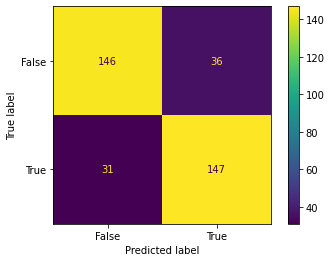

In [248]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### **Specificity and Sensitivity**

In [249]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitifivity = tp / (tp+fn)

print('specificity: {0:.2f}%'.format(specificity * 100))
print('sensitivity: {0:.2f}%'.format(sensitifivity * 100))
print('Summation of sensitivity and specificity: {0:.2f}'.format(specificity + sensitifivity))

specificity: 80.22%
sensitivity: 82.58%
Summation of sensitivity and specificity: 1.63


#### **Accuracy**

In [250]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('accuracy: {0:.2f}%'.format(accuracy * 100))

accuracy: 81.39%


# **Saving the model**

In [251]:
model.save('model.h5')

In [254]:
saved_model = load_model('/content/drive/MyDrive/IsefData/model.h5')
saved_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                130       
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dense_34 (Dense)            (None, 5)                 55        
                                                                 
 dense_35 (Dense)            (None, 1)                 6         
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


# **Indvisual test**

In [255]:
arr = []
for i in x_train_selected.columns:
  val = float(input(f"{i}: "))
  arr = arr + [val]
test = pd.DataFrame([arr], columns=x_train_selected.columns)
e = saved_model.predict(test)
e

BMXWT: 85
BMXHT: 185
BMXBMI: 35
RIDAGEYR: 17
MGXH1T1: 75
MGXH2T1: 72
MGXH1T2: 65
MGXH2T2: 67
MGXH1T3: 62
MGXH2T3: 60
MGDCGSZ: 65
RIAGENDR: 1
1/1 [==============================] - 0s 47ms/step


array([[0.]], dtype=float32)